In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
!pip install chart_studio
# pandas에서 바로 plotly로 그래프를 제작해주는 라이브러리 
!pip install cufflinks
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()
# 코랩에서 plotly가 보이지 않을 때 설정
# 해결방법: default renderer 세팅을 바꿔주기 
# https://plotly.com/python/renderers/#setting-the-default-renderer

import plotly.io as pio
pio.renderers.default = 'colab'

total = pd.read_excel('/content/국내 및 해외 영화의 관람객,매출액.xlsx')
top50 = pd.read_excel('/content/연도별 상위 50개 합본.xlsx')

del total['Unnamed: 0']
del top50['Unnamed: 0']

findfont: Font family ['NanumGothic Eco'] not found. Falling back to DejaVu Sans.


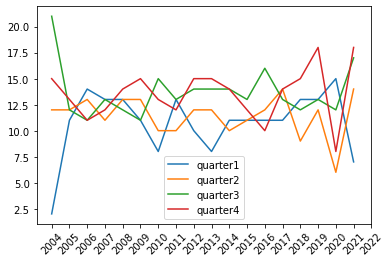

In [ ]:
# 상위50개 영화의 개봉일을 연도별 4분기로 나뉘어 시각화해보았다
# 내가 이 내용을 시각화한 이유는 흥행한 영화들이 몰리는 분기가 있는지, 그리고 시간의 흐름에 따라 영화 개봉 분기 빈도수의 변화가 존재하는지를 보기 위해서이다.


years = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
q1 = [] #year-01-01 ~ year-03-31
q2 = [] #year-04-01 ~ year-06-31
q3 = [] #year-07-01 ~ year-09-31
q4 = [] #year-10-01 ~ year-12-31
#연도가 키, 개봉수가 밸류값으로 선언을 for문돌리면서 추가해야함.

for year in range(2004,2022):
  q1.append(len(top50[(str(year) +'-01-01'<top50['개봉일']) & (top50['개봉일']<str(year)+'-03-31')]))
  q2.append(len(top50[(str(year) +'-04-01'<top50['개봉일']) & (top50['개봉일']<str(year)+'-06-31')]))
  q3.append(len(top50[(str(year) +'-07-01'<top50['개봉일']) & (top50['개봉일']<str(year)+'-09-31')]))
  q4.append(len(top50[(str(year) +'-10-01'<top50['개봉일']) & (top50['개봉일']<str(year)+'-12-31')]))

plt.plot(years, q1,label='quarter1')
plt.plot(years, q2,label='quarter2')
plt.plot(years, q3,label='quarter3')
plt.plot(years, q4,label='quarter4')
# plt.xlim(2004,2022) 
# plt.xticks(range(2004,2023), range(2004,2023))
plt.legend()
plt.xticks(range(2004,2023), range(2004,2023), size = 10, color = 'black', rotation = 45)
plt.show() #스택형이나 막대형으로 다른방법으로 표현해보기 



quarter_count = {
    '연도' : years,
    '1분기' : q1,
    '2분기' : q2,
    '3분기' : q3,
    '4분기' : q4,
}
df_quarter = pd.DataFrame(quarter_count)



from plotly.subplots import make_subplots
import plotly.graph_objects as go





In [ ]:
fig1 = px.line(df_quarter, x = '연도', y = ['1분기','2분기','3분기', '4분기'] , title='각 연도 분기별 영화 개봉수', height = 500  , width = 1000)
fig1.show()

In [ ]:
fig2 = px.bar(df_quarter, x = '연도', y = ['1분기','2분기','3분기', '4분기'] ,barmode = 'group', title='각 연도 분기별 영화 개봉수', height = 500  , width = 1000)
fig2.show()

In [ ]:
# 상위 50개 영화들에서 국내와 해외 영화들이 각각 몇개가 있고 둘을 비교하기 위해 연도별 국내/해외 개봉한 영화 갯수를 자료로 따로 뽑았다
#  

korea_count = []
foreign_count = []

for i in range(2004,2022):
  korea_count.append(len(top50[(top50['제작국가'] =='한국') & (top50['연도_x']==i)]))
  foreign_count.append(len(top50[(top50['제작국가'] !='한국') & (top50['연도_x']==i)]))

df_count = pd.DataFrame(data = list(zip(korea_count, foreign_count)), index=years, columns=['국내', '해외'])

year = list(range(2004,2022)) 

dic_count = {
    '연도' : year,
    '국내' : korea_count,
    '해외' : foreign_count
}

df_count = pd.DataFrame(dic_count)

a1 = px.line(df_count, x='연도', y=['국내','해외'],title='연도별 상위50개 국내/해외 개봉한 영화 갯수')
a1.show()



In [ ]:
b1 = px.bar(df_count, x='연도', y=['국내','해외'],title='연도별 상위50개 국내/해외 개봉한 영화 갯수')
b1.show()

In [ ]:
c1 = px.bar(df_count, x='연도', y=['국내','해외'],barmode = 'group',title='연도별 상위50개 국내/해외 개봉한 영화 갯수')
c1.show()